In [2]:
#LIBS
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from pprint import pprint
os. chdir('/Users/grovesdixon/gitreps/Federal-Employees-Feelings')
exec(open("my_functions.py").read())
print('libs loaded')

libs loaded


In [3]:
#GLOBAL VARS
CV=4
N_JOBS=1
RAND_STATE=123
print('global vars set')

global vars set


In [4]:
#LOAD THE DATA
fed_train = pd.read_csv('data/train_set.csv.gz', compression='gzip')


  my_leaving        RANDOM AGENCY LEVEL1    DSEX  \
0         no  171325524603     AR   ARCE    Male   
1         no  180563326403     AR   ARCE    Male   
2        yes  173832153842     AR   ARCE    Male   
3        yes  175160776346     AR   ARCE    Male   
4        yes  173060526266     AR   ARCE  Female   

                           DEDUC                  DFEDTEN  \
0              Bachelor's Degree       Ten years or fewer   
1              Bachelor's Degree       Ten years or fewer   
2  Less than a Bachelor's Degree       Ten years or fewer   
3     Beyond a Bachelor's Degree       Ten years or fewer   
4  Less than a Bachelor's Degree  Between 10 and 20 years   

                       DSUPER     DMINORITY    POSTWT  ...  Q62  Q63  Q64  \
0  Non-Supervisor/Team Leader      Minority  1.869401  ...    4    4    4   
1  Non-Supervisor/Team Leader      Minority  1.584745  ...    4    4    3   
2  Non-Supervisor/Team Leader  Non-Minority  1.486504  ...    2    3    2   
3  Non-Super

In [6]:
#PREP THE DATA
fed_train = pd.read_csv('data/train_set.csv.gz', compression='gzip')

def prep_data(df):
    
    #get outcome in numerical binary
    y = np.array(df['my_leaving'])
    y = (y=='yes').astype('int')
    
    #format features
    to_drop = ['my_leaving', 'RANDOM', 'AGENCY', 'LEVEL1', 'POSTWT']
    X0 = df.drop(to_drop, 1)
    to_onehot = ['DSEX','DEDUC','DFEDTEN','DSUPER','DMINORITY']
    X = pd.get_dummies(X0, columns = to_onehot)
    return(X, y)


X, y = prep_data(fed_train)
print(X)
print(y)
print(X.shape)
print(y.shape)

        Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  DEDUC_Bachelor's Degree  \
0        4   4   4   4   4   4   4   4   4    4  ...                        1   
1        4   4   5   4   4   4   5   5   4    4  ...                        1   
2        3   2   3   4   5   3   5   5   3    4  ...                        0   
3        5   4   4   4   4   4   5   5   4    4  ...                        0   
4        2   1   2   3   4   4   5   5   1    1  ...                        0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...                      ...   
408059   5   4   5   5   5   5   2   5   5    5  ...                        0   
408060   5   4   5   5   5   5   5   5   3    4  ...                        1   
408061   2   3   4   3   3   3   4   4   4    4  ...                        0   
408062   5   5   5   5   5   5   5   5   5    5  ...                        0   
408063   2   4   2   4   4   4   5   4   2    4  ...                        0   

        DEDUC_Beyond a Bach

In [9]:
#LOGISTIC REGRESSION
#get a baseline prediction with logistic regression

#set up model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

#train
log_reg.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

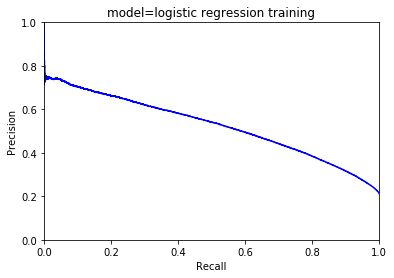

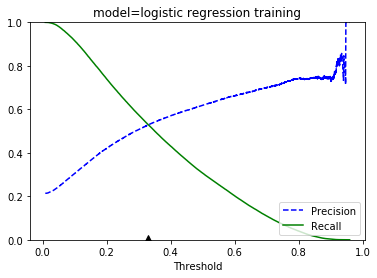

Confusion matrix for threshold = 0.33:
[[279626  41129]
 [ 41130  46179]]
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    320755
           1       0.53      0.53      0.53     87309

    accuracy                           0.80    408064
   macro avg       0.70      0.70      0.70    408064
weighted avg       0.80      0.80      0.80    408064



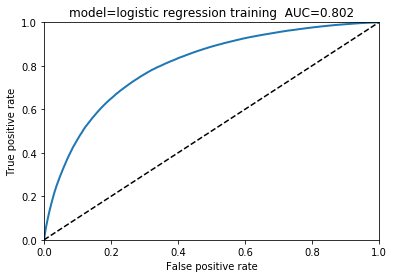

In [10]:
#logistic regression performance on training
probs_log_t = log_reg.predict_proba(X)
scores_log_t = probs_log_t[:, 1]
log_perf_t = get_model_performance('logistic regression training', X, scores_log_t, y, pos_label=1)

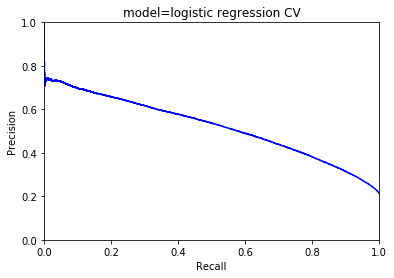

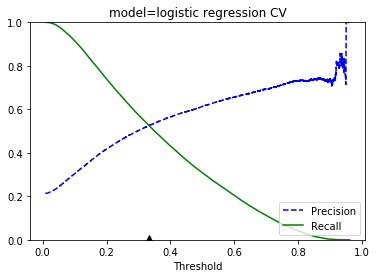

Confusion matrix for threshold = 0.33:
[[279328  41427]
 [ 41428  45881]]
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    320755
           1       0.53      0.53      0.53     87309

    accuracy                           0.80    408064
   macro avg       0.70      0.70      0.70    408064
weighted avg       0.80      0.80      0.80    408064



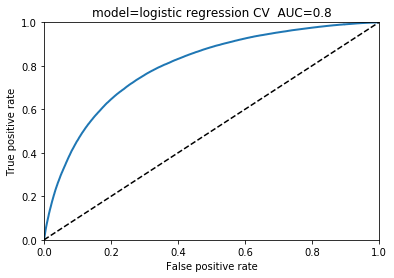

In [11]:
#logistic regression cross validation
probs_log_cv = cross_val_predict(log_reg, X, y, cv=CV, method="predict_proba")
scores_log_cv = probs_log_cv[:, 1]
log_perf_cv = get_model_performance('logistic regression CV', X, scores_log_cv, y, pos_label=1)

In [12]:
#RANDOM FOREST
#build random forest model

#set up model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=N_JOBS)

#train
rf_clf.fit(X, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

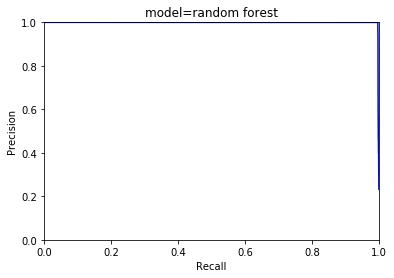

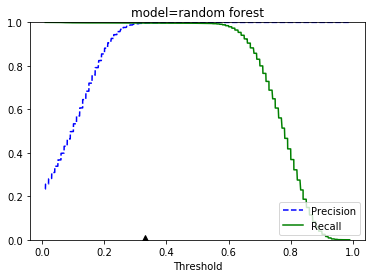

Confusion matrix for threshold = 0.33:
[[320528    227]
 [   274  87035]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320755
           1       1.00      1.00      1.00     87309

    accuracy                           1.00    408064
   macro avg       1.00      1.00      1.00    408064
weighted avg       1.00      1.00      1.00    408064



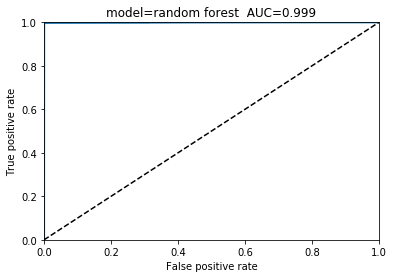

In [13]:
#random forest performance on training
probs_rf_t = rf_clf.predict_proba(X)
scores_rf_t = probs_rf_t[:, 1]
rf_perf_t = get_model_performance('random forest', X, scores_rf_t, y, pos_label=1)

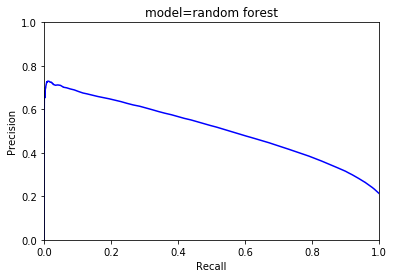

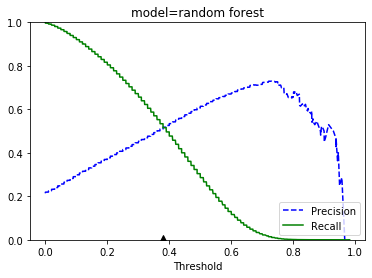

Confusion matrix for threshold = 0.38:
[[278885  41870]
 [ 42309  45000]]
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    320755
           1       0.52      0.52      0.52     87309

    accuracy                           0.79    408064
   macro avg       0.69      0.69      0.69    408064
weighted avg       0.79      0.79      0.79    408064



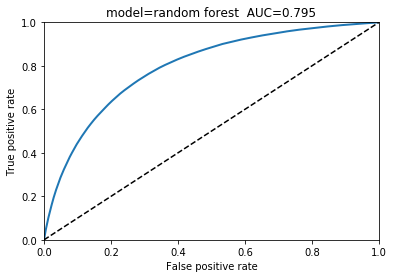

In [14]:
#random forest cross validate
probs_rf_cv = cross_val_predict(rf_clf, X, y, cv=CV,method="predict_proba")
scores_rf_cv = probs_rf_cv[:, 1]
rf_perf_cv = get_model_performance('random forest', X, scores_rf_cv, y, pos_label=1)

In [15]:
#------- OPTIMIZE RF
#use RandomizedSearchCV() to optimized Random forest hyperparameters
from sklearn.model_selection import RandomizedSearchCV

#choose parameter grid values
max_features = ['auto', 'sqrt']
max_depth = [10, 50, 100, 200, 500, None]
min_samples_split = [2, 10, 50, 100, 250, 500]
min_samples_leaf = [1, 5, 10, 25, 100, 250, 500, 1000]
bootstrap = [True, False]

#make grid dict
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# ### run random search
# rf_search = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=RAND_STATE, n_jobs = 1)
# rf_search.fit(X, y)
# rf_search.best_params_


#or just select the best parameters if already run
best_params = {'min_samples_split': 250,
  'min_samples_leaf': 5,
  'max_features': 'sqrt',
  'max_depth': 100,
  'bootstrap': True}

print('Best parameters:')
print(best_params)


{'min_samples_split': 250, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}


In [17]:
#OPTIMIZED MODEL

#set up optimized rf model based on from best_params above
rf_opt = RandomForestClassifier(n_jobs=N_JOBS,
                                min_samples_split = best_params['min_samples_split'],
                                min_samples_leaf = best_params['min_samples_leaf'],
                                max_features = best_params['max_features'],
                                max_depth = best_params['max_depth'],
                                bootstrap = best_params['bootstrap'])

#train
rf_opt.fit(X, y)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

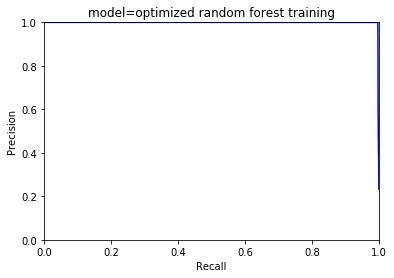

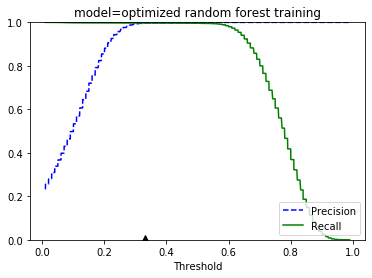

Confusion matrix for threshold = 0.33:
[[320528    227]
 [   274  87035]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320755
           1       1.00      1.00      1.00     87309

    accuracy                           1.00    408064
   macro avg       1.00      1.00      1.00    408064
weighted avg       1.00      1.00      1.00    408064



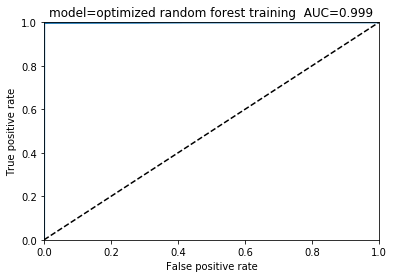

In [18]:
#optimized model performance on training set
probs_opt_t = rf_opt.predict_proba(X)
scores_opt_t = probs_rf_t[:, 1]
opt_perf_t = get_model_performance('optimized random forest training', X, scores_opt_t, y, pos_label=1)

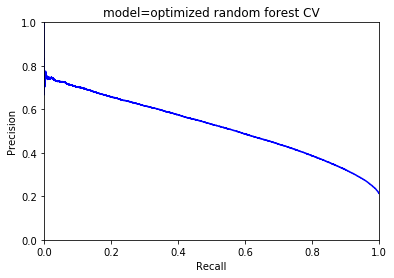

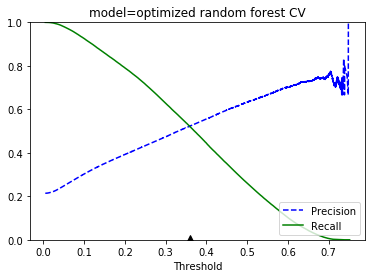

Confusion matrix for threshold = 0.36:
[[279035  41720]
 [ 41721  45588]]
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    320755
           1       0.52      0.52      0.52     87309

    accuracy                           0.80    408064
   macro avg       0.70      0.70      0.70    408064
weighted avg       0.80      0.80      0.80    408064



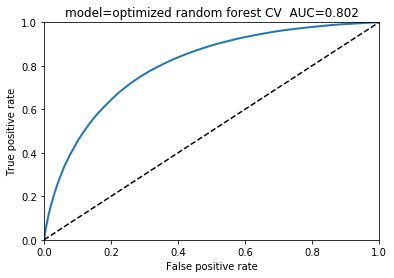

In [19]:
#optimized model cross validation
probs_opt_cv = cross_val_predict(rf_opt, X, y, cv=CV, method="predict_proba")
scores_opt_cv = probs_opt_cv[:, 1]
np.mean(scores_opt_cv)
opt_perf_cv = get_model_performance('optimized random forest CV', X, scores_opt_cv, y, pos_label=1)

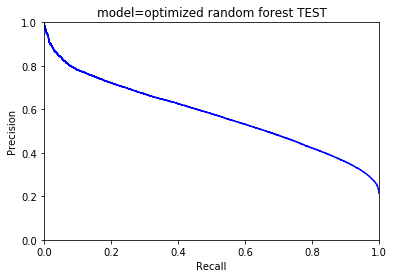

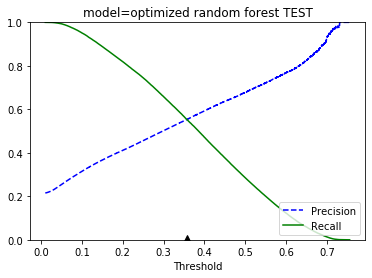

Confusion matrix for threshold = 0.36:
[[281761  38994]
 [ 38995  48314]]
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88    320755
           1       0.55      0.55      0.55     87309

    accuracy                           0.81    408064
   macro avg       0.72      0.72      0.72    408064
weighted avg       0.81      0.81      0.81    408064



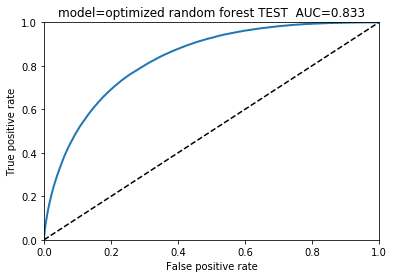

In [21]:
#RUN OPTIMIZED MODEL ON TEST SET

fed_test = pd.read_csv('data/test_set.csv.gz', compression='gzip')
X_test, y_test = prep_data(fed_train)

#predict for test set
test_probs = rf_opt.predict_proba(X_test)
test_scores = test_probs[:, 1]
test_perf = get_model_performance('optimized random forest TEST', X_test, test_scores, y_test, pos_label=1)

In [22]:
#COMPARE WITH SIMPLE CUTOFF 

simple_train = pd.read_csv('data/train_simple.csv.gz', compression='gzip')
simple_test = pd.read_csv('data/test_simple.csv.gz', compression='gzip')

def run_simple(df):
    y=(df['my_leaving'].values=='yes').astype('int')
    satisSq = df['satis']**2
    pred = (satisSq < df['splitter']).astype('int')
    return y, pred

#run simple cutoff on training
s_y, s_pred = run_simple(simple_train)
print('Classification report for simple training predictions:')
print(classification_report(s_y, s_pred))


#run simple cutoff on test
print('Classification report for simple test predictions:')
s_y_test, s_pred_test = run_simple(simple_test)
print(classification_report(s_y_test, s_pred_test))

Classification report for simple training predictions:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76    320755
           1       0.36      0.69      0.47     87309

    accuracy                           0.67    408064
   macro avg       0.62      0.68      0.61    408064
weighted avg       0.77      0.67      0.70    408064

Classification report for simple test predictions:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76     80432
           1       0.35      0.68      0.46     21449

    accuracy                           0.67    101881
   macro avg       0.62      0.67      0.61    101881
weighted avg       0.77      0.67      0.70    101881

